In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

In [8]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/hetongwang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Text(0.5, 1.0, 'Accident Severity (imbalanced)')

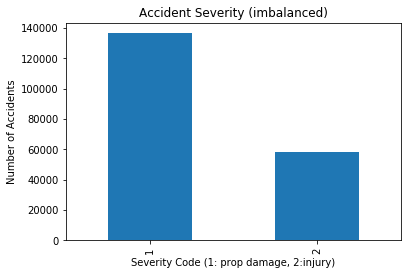

In [9]:

df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (imbalanced)')

In [10]:
#Getting the number of missing values in each column
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [11]:
# Oversampling
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

Text(0.5, 1.0, 'Accident Severity (balanced)')

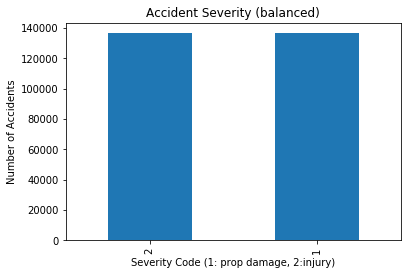

In [12]:
# Let's see how balanced the dataset using oversmapling looks.
df_upsampled.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (balanced)')

In [13]:

# Rename X and Y with Longitude and Latitude 
df1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [14]:
# Drop LOCATION; Langitude and Latitude used instead.
# Two copies of SEVERITYCODE exist, drop the second SEVERITYCODE.1
#Drop columns incluidng codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM --->
#ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop redundant infos: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  
df2 = df1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [15]:
#Getting the type of each column
df2.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
INATTENTIONIND     object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object

In [16]:
#Getting the shape of the data frame
df2.shape

(194673, 11)

In [17]:
#Getting the name of each column
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [18]:
df2.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [19]:
#Returning the objects containing counts of unique values
df2['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [20]:
# Replacing NaN value by Unknown
df2['WEATHER'].replace(np.NaN, "Unknown", inplace=True)

In [21]:
# Replacing Unknown and Other by Clear, the most frequent value of the column
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df2.replace(encoding_WEATHER, inplace=True)
df2['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [22]:
df2['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [23]:
# Replacing NaN value by N
df2['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [24]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_SPEEDING, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [25]:
df2['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [26]:
# Replacing NaN value by Unknown
df2['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [27]:
# Replacing Unknown and Other by Daylight, the most frequent value of the column
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df2.replace(encoding_LIGHTCOND, inplace=True)
df2['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [28]:
df2['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [29]:
# Replacing NaN value by Unknown
df2['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [30]:
# Replacing Unknown and Other by Dry, the most frequent value of the column
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df2.replace(encoding_ROADCOND, inplace=True)
df2['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [31]:
df2['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [32]:
# Replacing NaN value by Unknown
df2['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [33]:
# Replacing Unknown by Mid-Block (not related to intersection), the most frequent value of the column
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df2.replace(encoding_JUNCTIONTYPE, inplace=True)
df2['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [34]:
df2['LONGITUDE'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: LONGITUDE, Length: 23563, dtype: int64

In [35]:
# NaN values are placed by the mean values of the column
avg_LONGITUDE = df2["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df2['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

Average of LONGITUDE: -122.33051843904114


In [36]:
df2['LATITUDE'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: LATITUDE, Length: 23839, dtype: int64

In [37]:
# NaN values are placed by the mean values of the column
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df2['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LATITUDE: 47.619542517688615


In [38]:
# 1:prop damage   2:injury
df2['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [39]:
df2['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [40]:
#Replacing NaN value by N
df2['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [41]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_INATTENTIONIND, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [42]:
df2.isna().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [43]:
#Tabulating the first five rows
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0


In [44]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [45]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [46]:
#Visualizing 300 data points on the map
limit = 300
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [47]:
# Instantiate a feature group for the incidents in the dataframe

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 300 points and add each to the incidents feature group
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Seattle_map.add_child(incidents)

In [48]:
#Selecting the severity code of 2 i.e. with injuries and making  another data frame for this purpose
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0
7,2,-122.320780,47.614076,3,1,2,0,1,1,0,0
9,2,-122.384700,47.528475,2,2,2,0,1,1,0,0
14,2,-122.317414,47.664028,2,2,1,0,1,1,1,0


In [49]:
#Relationship between the weather conditions and the accident severity with injury
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    37856
2    11176
3     8745
5      187
4      171
6       28
7       15
8        7
9        3
Name: WEATHER, dtype: int64

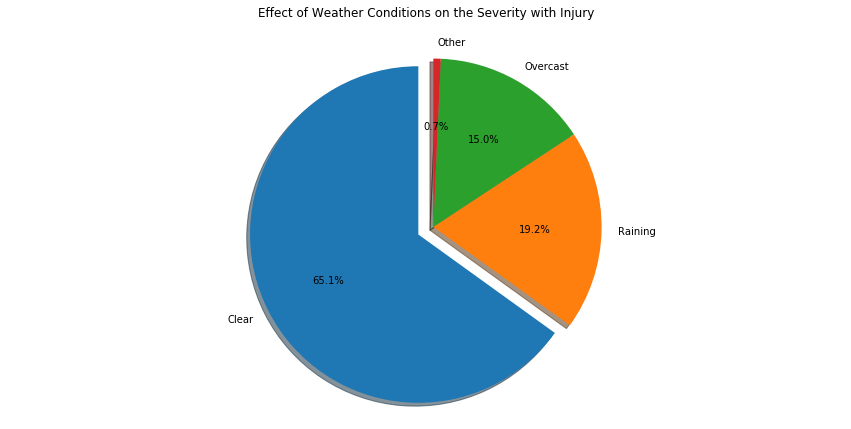

In [50]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Weather Conditions on the Severity with Injury', y=1.05)
plt.show()

In [51]:
#Relationship between the person count and the accident severity with injury
Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
Sev_2_p

2     27811
3     13461
4      6295
1      3296
5      2969
0      1762
6      1357
7       637
8       284
9       129
10       74
11       33
12       20
13       12
17        8
15        7
14        7
16        5
22        2
19        2
34        2
23        1
32        1
28        1
27        1
25        1
24        1
48        1
37        1
54        1
39        1
20        1
18        1
81        1
29        1
30        1
Name: PERSONCOUNT, dtype: int64

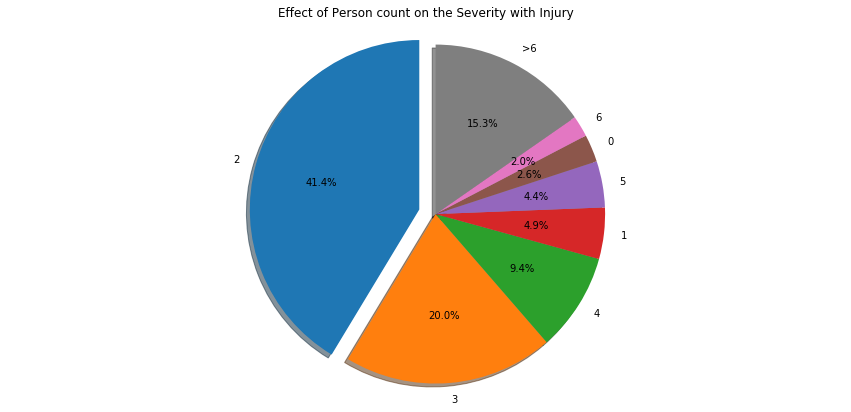

In [52]:
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Person count on the Severity with Injury', y=1)
plt.show()

In [53]:
Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
Sev_2_v

2     35949
1     14105
3      5470
0      1227
4      1078
5       261
6        60
7        22
9         6
8         5
11        3
10        2
Name: VEHCOUNT, dtype: int64

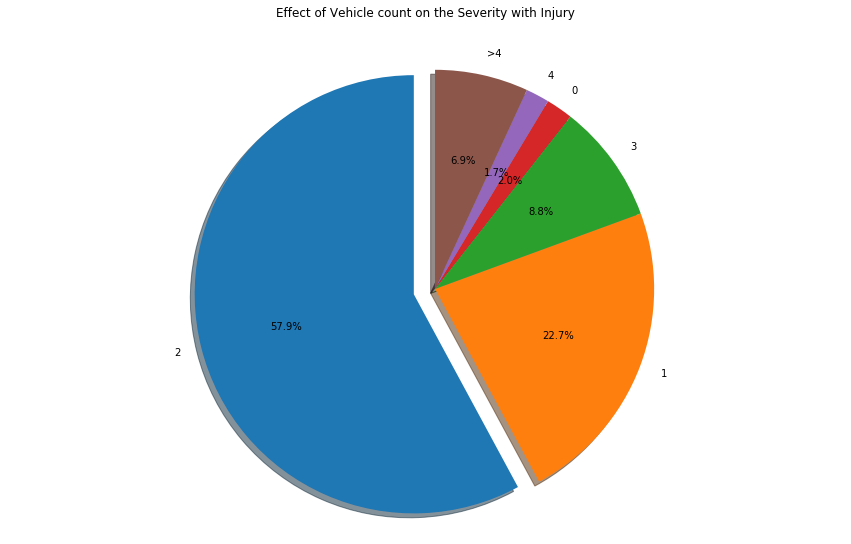

In [54]:
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Vehicle count on the Severity with Injury', y=1.05)
plt.show()

In [55]:
#Relationship between the junction type and the accident severity with injury
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
Sev_2_j

2    27174
1    19806
3     7297
4     3234
5      623
6       54
Name: JUNCTIONTYPE, dtype: int64

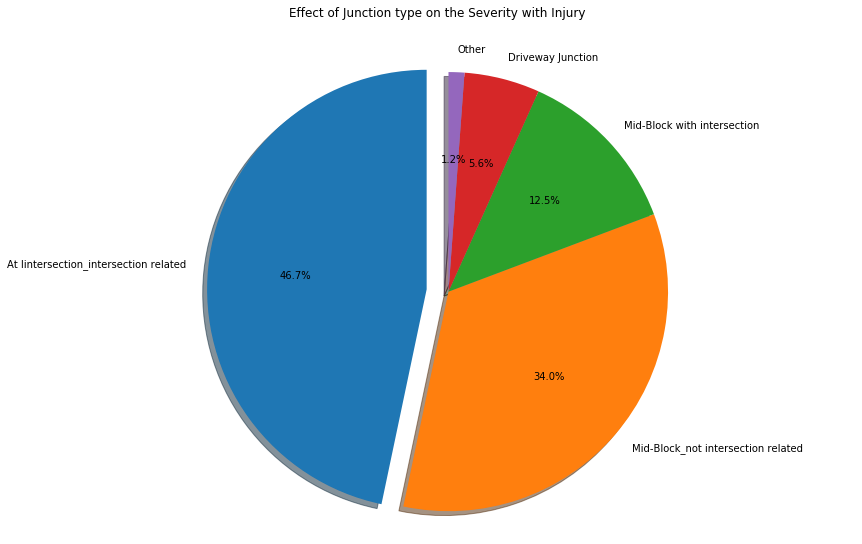

In [56]:
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Junction type on the Severity with Injury', y=1.05)
plt.show()

In [57]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
Sev_2_i

0    47791
1    10397
Name: INATTENTIONIND, dtype: int64

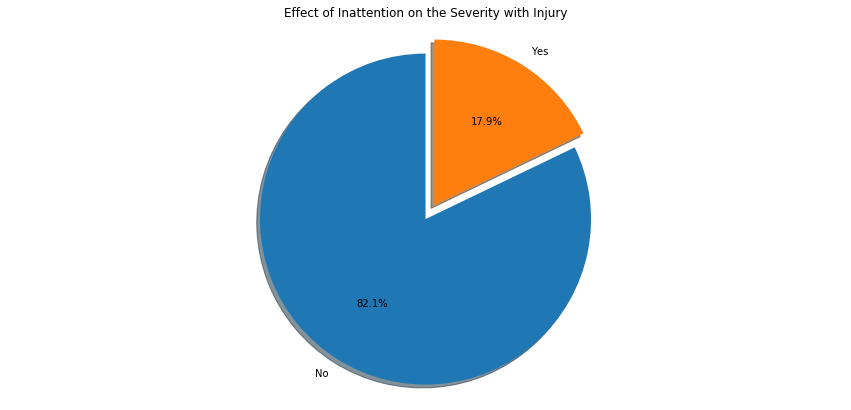

In [58]:
labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Inattention on the Severity with Injury', y=1)
plt.show()

In [59]:
#Relationship between the road conditions and the accident severity with injury
Sev_2_r = Sev_2['ROADCOND'].value_counts()
Sev_2_r

1    41916
2    15755
3      273
4      167
5       30
7       24
6       23
Name: ROADCOND, dtype: int64

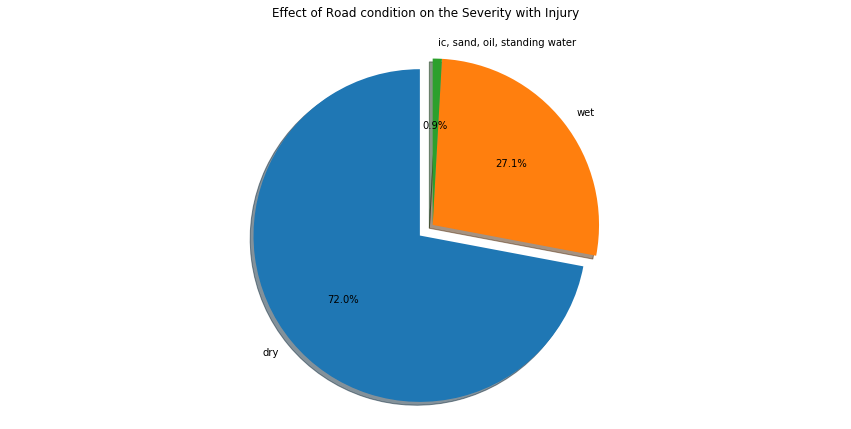

In [60]:
labels = 'dry', 'wet', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Road condition on the Severity with Injury', y=1.05)
plt.show()

In [61]:
#Modeling, Testing and Evaluation

#Making a new data frame
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [62]:
X = Feature

In [63]:
y = df2['SEVERITYCODE'].values

In [64]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.24930404,  1.50948129, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  1.91514317,  1.3926872 , -0.66472702, -0.22440165],
       [-0.56747188,  0.49889979, -0.33020207,  0.12553783, -0.81596734,
        -0.42518348,  0.64986567,  1.3926872 ,  1.50437693, -0.22440165],
       [-0.1360361 , -0.21073866,  1.15576451,  1.7102107 , -0.81596734,
        -0.42518348,  1.91514317, -0.53629605, -0.66472702, -0.22440165],
       [-0.14494267, -0.26614566,  0.41278122,  1.7102107 , -0.81596734,
        -0.42518348, -0.61541182, -0.53629605, -0.66472702, -0.22440165],
       [ 0.81495737, -1.33262277, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  0.64986567,  1.3926872 , -0.66472702, -0.22440165]])

In [65]:

#Splitting the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


In [66]:

#Finding the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

KeyboardInterrupt: 

In [ ]:

#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()